In [1]:
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('history_cleaned.csv')
df.shape

(7479, 2)

In [3]:
df.head()

,Time,domain
0,2021-09-27 23:16:48,www.youtube.com
1,2021-09-27 23:16:48,www.youtube.com
2,2021-09-27 23:07:45,hangouts.google.com
3,2021-09-27 23:07:45,hangouts.google.com
4,2021-09-27 23:01:12,mail.google.com


In [4]:
df.tail()

,Time,domain
7474,1600-12-31 19:00:00,github.com
7475,1600-12-31 19:00:00,www.troweprice.com
7476,1600-12-31 19:00:00,madewithml.com
7477,1600-12-31 19:00:00,gist.github.com
7478,1600-12-31 19:00:00,developer.tdameritrade.com


In [5]:
df.dtypes

Time      object
domain    object
dtype: object

In [6]:
# time column is string and string date is starting with YYYY, so I can do string compares
sum(df['Time'] < '1900') 

34

In [7]:
# I filter and get a copy, so I will not work on a slice, this will be a new dataframe. (essentially losing 1900 data points)
df = df[df.Time > '1900'].copy() 

In [8]:
df['Time'] = pd.to_datetime(df['Time'])

In [9]:
df['domain'].value_counts()[:50]

www.facebook.com                 1297
www.google.com                   1151
www.zillow.com                    505
mail.google.com                   450
www.redfin.com                    373
www.netflix.com                   214
hangouts.google.com               212
www.amazon.com                    208
www.homesnap.com                  185
www.imdb.com                      140
secure.bankofamerica.com          124
www.youtube.com                   121
www.airbnb.com                    103
www.udemy.com                      95
connect.secure.wellsfargo.com      82
leetcode.com                       75
github.com                         56
cityprotect.com                    53
niksgames.com                      48
online.citi.com                    47
invest.ameritrade.com              46
www.disneyplus.com                 42
www.linkedin.com                   37
olui2.fs.ml.com                    35
www.priceline.com                  34
messages.google.com                33
www.nacalynx

<AxesSubplot:>

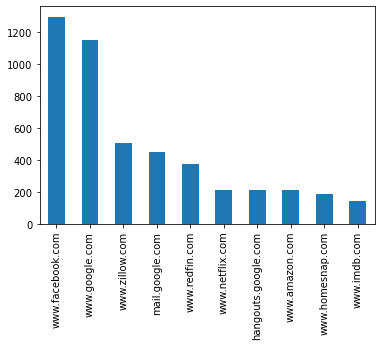

In [10]:
# top 10 sites that I visisted
df['domain'].value_counts()[:10].plot(kind='bar')

In [11]:
hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
hourly_counts

Time
0     968
1     412
2     200
3     109
4     144
5      23
6     106
7      42
8      38
9      48
10    104
11     46
12    187
13    328
14    294
15    335
16    121
17    251
18    239
19    601
20    608
21    535
22    813
23    893
Name: domain, dtype: int64

<AxesSubplot:xlabel='Time'>

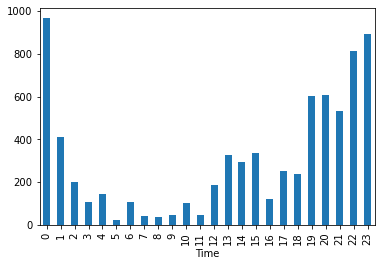

In [12]:
hourly_counts.plot.bar()

In [13]:
df['Day'] = [ d.day_name() for d in df['Time']]
df['DayIndex'] = [ d.dayofweek for d in df['Time']]
df.head()

,Time,domain,Day,DayIndex
0,2021-09-27 23:16:48,www.youtube.com,Monday,0
1,2021-09-27 23:16:48,www.youtube.com,Monday,0
2,2021-09-27 23:07:45,hangouts.google.com,Monday,0
3,2021-09-27 23:07:45,hangouts.google.com,Monday,0
4,2021-09-27 23:01:12,mail.google.com,Monday,0


In [14]:
df['Day'].value_counts()

Thursday     1514
Monday       1471
Saturday     1183
Sunday       1151
Wednesday     924
Tuesday       824
Friday        378
Name: Day, dtype: int64

In [15]:
days_sorted = df['DayIndex'].value_counts().sort_index()
days_sorted

0    1471
1     824
2     924
3    1514
4     378
5    1183
6    1151
Name: DayIndex, dtype: int64

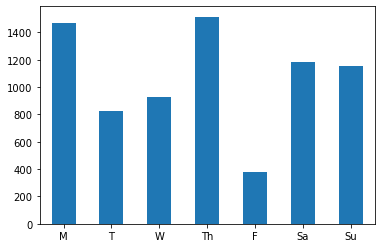

In [16]:
days_sorted.plot.bar()
plt.xticks(days_sorted.index, ['M', 'T', 'W','Th', 'F', 'Sa', 'Su'], rotation=0)

plt.show()

In [17]:
def is_weekend(day): 
    return day in ['Saturday', 'Sunday']


df['isWeekend'] = [ is_weekend(i) for i in df['Day']]
df.head()

,Time,domain,Day,DayIndex,isWeekend
0,2021-09-27 23:16:48,www.youtube.com,Monday,0,False
1,2021-09-27 23:16:48,www.youtube.com,Monday,0,False
2,2021-09-27 23:07:45,hangouts.google.com,Monday,0,False
3,2021-09-27 23:07:45,hangouts.google.com,Monday,0,False
4,2021-09-27 23:01:12,mail.google.com,Monday,0,False


In [18]:
weekend = df[ df['isWeekend'] == True ]

weekday = df[ df['isWeekend'] == False ]


In [19]:
weekend.head()

,Time,domain,Day,DayIndex,isWeekend
112,2021-09-26 01:33:58,www.facebook.com,Sunday,6,True
113,2021-09-26 01:33:58,www.facebook.com,Sunday,6,True
114,2021-09-26 01:33:58,www.facebook.com,Sunday,6,True
115,2021-09-26 01:33:58,www.facebook.com,Sunday,6,True
116,2021-09-26 01:33:44,mail.google.com,Sunday,6,True


In [20]:
weekday['domain'].value_counts()[:5]

www.google.com      903
www.facebook.com    852
mail.google.com     337
www.zillow.com      319
www.redfin.com      231
Name: domain, dtype: int64

In [21]:
weekend['domain'].value_counts()[:5]

www.facebook.com    445
www.google.com      248
www.zillow.com      186
www.redfin.com      142
mail.google.com     113
Name: domain, dtype: int64

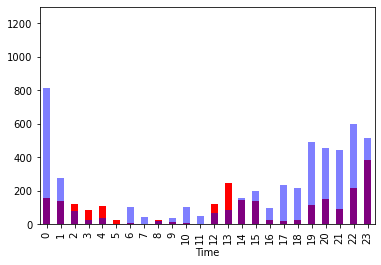

In [22]:
def show_stats(df, color, alpha=1):
    hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
    
    # fill in the missing hours
    for h in range(24):
        if h not in hourly_counts:
            hourly_counts[h]=0 # I initially didn't do this and hours were not lining up
            
    hourly_counts.sort_index().plot.bar(color=color, alpha=alpha)
    plt.ylim([0, 1300])

    
show_stats(weekend, 'red', 1)
    
show_stats(weekday, 'blue', 0.5)


In [23]:
# be skeptical about your data!
# am I on computer a lot more on the weekdays 
# or it shows more simply becasue there are more weekdays 

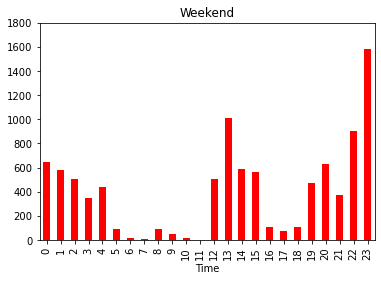

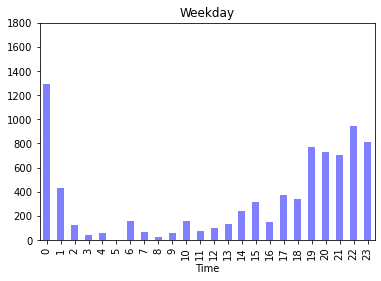

In [24]:
def show_stats(df, color, alpha=1, title='', y_lim = None):
    hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
    
    days_counts = df.Time.dt.date.nunique()
    
    # fill in the missing hours
    for h in range(24):
        if h not in hourly_counts:
            hourly_counts[h]=0 # I initially didn't do this and hours were not lining up
        else: 
            hourly_counts[h] = hourly_counts[h] * 100.0 /  days_counts # I multiplied by 100.0 to make it float and also not to loose decimals
            
    hourly_counts.sort_index().plot.bar(color=color, alpha=alpha, title=title)
    
    if y_lim != None:
        plt.ylim(y_lim)
    plt.show()


    
y_lim=[0, 1800]
show_stats(weekend, 'red', 1, 'Weekend', y_lim=y_lim)
    
show_stats(weekday, 'blue', 0.5, 'Weekday', y_lim=y_lim)

In [25]:
df['domain'].value_counts()[:50]

www.facebook.com                 1297
www.google.com                   1151
www.zillow.com                    505
mail.google.com                   450
www.redfin.com                    373
www.netflix.com                   214
hangouts.google.com               212
www.amazon.com                    208
www.homesnap.com                  185
www.imdb.com                      140
secure.bankofamerica.com          124
www.youtube.com                   121
www.airbnb.com                    103
www.udemy.com                      95
connect.secure.wellsfargo.com      82
leetcode.com                       75
github.com                         56
cityprotect.com                    53
niksgames.com                      48
online.citi.com                    47
invest.ameritrade.com              46
www.disneyplus.com                 42
www.linkedin.com                   37
olui2.fs.ml.com                    35
www.priceline.com                  34
messages.google.com                33
www.nacalynx

In [26]:
df['domain'] = df['domain'].astype(str)

In [27]:
def get_data_for_domain(val):
    return df[ [True if val.lower() in i.lower() else False for i in df['domain'] ]]


def show_domain_stats(domain, color='blue', alpha=1):
    data = get_data_for_domain(domain)
    show_stats(data, color, alpha)
    return data

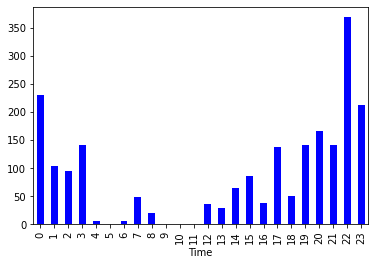

In [28]:
_= show_domain_stats('facebook', 'blue')

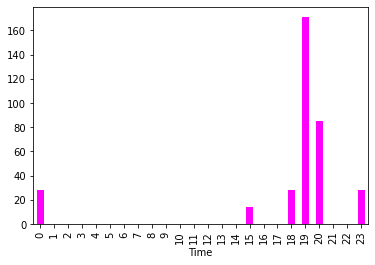

In [29]:
_ = show_domain_stats('stackover', 'magenta')


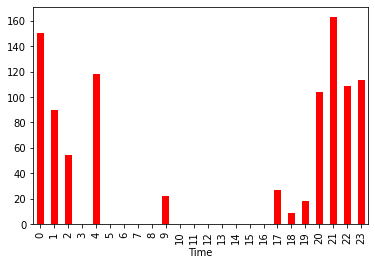

In [30]:
_ = show_domain_stats('netflix', 'red')


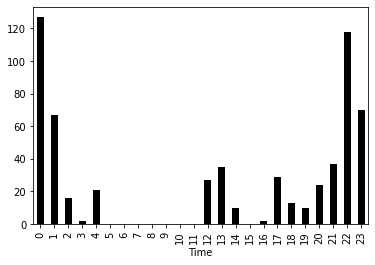

In [31]:
_=show_domain_stats('amazon', 'black')

### Based on data, what can we tell about this person?

1. Is this a work computer/personal computer?
1. Is he employed?
1. What is his interests?
1. Anything interesting? 

answer here

### What do you think about this assignment? ( 3 sentences at most! ) 

answer here

__NOTE__: If you give your permission for another student to analyze your `history_cleaned.csv` please commit it with this hw file.

(Your name will stay confidencial)